# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [195]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt 

from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [196]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [197]:
# set up the url address
url = "http://api.openweathermap.org/data/2.5/weather?"

# set up lists to hold reponse info
City        = []
Cloudiness  = []
Country     = []
Date        = []
Humidity    = []
Lat         = []
Lng         = []
Max_Temp    = []
Wind_Speed  = []

# for each of the city from the list genereated
for city in cities:
    print("Extracting data for " + city)
    
    # handle key errors.  Weather API may not have information on some of 
    # random cities genereated above. 
    try:
        # get the weather data using the city as key 
        # temperature unit in Fahrenheit
        query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
        weather_response = requests.get(query_url)
        data = weather_response.json()

        # extract from data received and populate the lists
        City.append(data['name'])
        Cloudiness.append(data['clouds']['all'])
        Country.append(data['sys']['country'])
        Date.append(data['dt'])
        Humidity.append(data['main']['humidity'])
        Lat.append(data['coord']['lat'])
        Lng.append(data['coord']['lon'])
        Max_Temp.append(data['main']['temp_max'])
        Wind_Speed.append(data['wind']['speed'])
    
    except KeyError:
        print("No information on " + city)


Extracting data for atuona
Extracting data for ribeira grande
Extracting data for coquimbo
Extracting data for iqaluit
Extracting data for new norfolk
Extracting data for shenjiamen
Extracting data for vakhrushev
Extracting data for cape town
Extracting data for kamenskoye
No information on kamenskoye
Extracting data for vestmannaeyjar
Extracting data for slave lake
Extracting data for saint-augustin
Extracting data for belushya guba
No information on belushya guba
Extracting data for clyde river
Extracting data for jamestown
Extracting data for ushuaia
Extracting data for vaini
Extracting data for dikson
Extracting data for albany
Extracting data for wodonga
Extracting data for kodiak
Extracting data for punta arenas
Extracting data for balasheyka
Extracting data for severo-kurilsk
Extracting data for hamilton
Extracting data for vila velha
Extracting data for hobart
Extracting data for thompson
Extracting data for mataura
Extracting data for avarua
Extracting data for vaitupu
No info

Extracting data for elmira
Extracting data for mehamn
Extracting data for lumberton
Extracting data for nizhniy odes
Extracting data for gari
Extracting data for imeni poliny osipenko
Extracting data for avera
Extracting data for grindavik
Extracting data for erenhot
Extracting data for akdagmadeni
Extracting data for margate
Extracting data for shelburne
Extracting data for porto walter
Extracting data for matay
Extracting data for kamenskiy
Extracting data for diego de almagro
Extracting data for dzhusaly
No information on dzhusaly
Extracting data for great bend
Extracting data for talnakh
Extracting data for saint-ambroise
Extracting data for nurobod
Extracting data for ramhormoz
Extracting data for ifanadiana
Extracting data for luanda
Extracting data for timra
Extracting data for kenai
Extracting data for calabaca
Extracting data for barentsburg
No information on barentsburg
Extracting data for phan rang
No information on phan rang
Extracting data for grand gaube
Extracting data f

Extracting data for fukue
Extracting data for boende
Extracting data for sao paulo de olivenca
Extracting data for alice springs
Extracting data for san patricio
Extracting data for salalah
Extracting data for hami
Extracting data for sibolga
Extracting data for puruliya
Extracting data for bonavista
Extracting data for takoradi
Extracting data for dalbandin
Extracting data for teluk nibung
No information on teluk nibung
Extracting data for ahipara
Extracting data for churapcha
Extracting data for novoagansk
Extracting data for tomohon
Extracting data for la ronge
Extracting data for novosokolniki
Extracting data for saint anthony
Extracting data for opuwo
Extracting data for labutta
No information on labutta
Extracting data for ruatoria
No information on ruatoria
Extracting data for jonava
Extracting data for flagstaff
Extracting data for caicedo
Extracting data for mattru
Extracting data for tlaltizapan
Extracting data for boundiali
Extracting data for iquique
Extracting data for vil

In [205]:
# create a data frame from cities, lat, and temp
weather_dict = {
    'city': City,
    'cloudiness': Cloudiness,
    'country': Country,
    'date': Date,
    'humidity': Humidity,
    'lat': Lat,
    'lng': Lng,
    'max_temp': Max_Temp,
    'wind_speed': Wind_Speed
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()

print("We have weather information on " + str(weather_df.shape[0]) + " cities")
weather_df.head(10)

We have weather information on 542 cities


,city,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed
0,Atuona,0,PF,1536879257,98,-9.80,-139.03,80.05,17.29
1,Ribeira Grande,88,PT,1536879257,100,38.52,-28.70,73.75,11.81
2,Coquimbo,90,CL,1536876000,81,-29.95,-71.34,53.60,8.05
3,Iqaluit,20,CA,1536876000,60,63.75,-68.52,39.20,18.34
4,New Norfolk,40,AU,1536877800,51,-42.78,147.06,60.80,16.11
5,Shenjiamen,0,CN,1536879258,97,29.96,122.30,79.69,3.65
6,Vakhrushev,0,RU,1536879258,82,48.99,142.86,64.66,3.65
7,Cape Town,75,ZA,1536876000,82,-33.93,18.42,57.20,12.75
8,Vestmannaeyjar,56,IS,1536879259,92,63.44,-20.27,46.57,8.68
9,Slave Lake,90,CA,1536876000,64,55.28,-114.77,33.80,2.24


In [199]:
# Save the data in csv file
# Note to avoid any issues later, use encoding="utf-8"
weather_df.to_csv("weather_data.csv", encoding="utf-8", index=False)

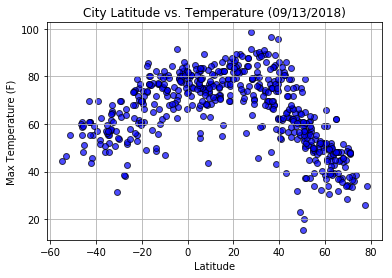

In [200]:
#  --------------  Latitude vs. Temperature Plot  --------------------

# x_axis ==> Latitude
# y_axis ==> Max Temperature (F)

plt.scatter(weather_df['lat'], weather_df['max_temp'], edgecolors="black",
            marker="o", alpha=0.7, facecolors="blue")

# cosmatic stuff
todays_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.title("City Latitude vs. Temperature (" + todays_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Temperature.png")
plt.show()

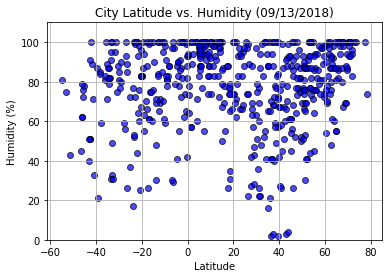

In [201]:
#  --------------  Latitude vs. Humidity Plot  --------------------

# x_axis ==> Latitude
# y_axis ==> Humidity (%)

plt.scatter(weather_df['lat'], weather_df['humidity'], edgecolors="black",
            marker="o", alpha=0.7, facecolors="blue")

# cosmatic stuff
todays_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.title("City Latitude vs. Humidity (" + todays_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 110)
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Humidity.png")
plt.show()

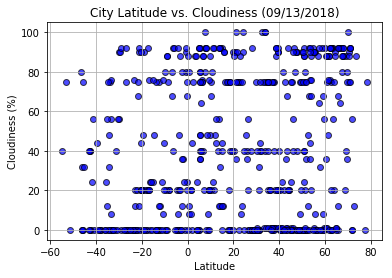

In [202]:
#  --------------  Latitude vs. Cloudiness Plot  --------------------

# x_axis ==> Latitude
# y_axis ==> Cloudiness (%)

plt.scatter(weather_df['lat'], weather_df['cloudiness'], edgecolors="black",
            marker="o", alpha=0.7, facecolors="blue")

# cosmatic stuff
todays_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.title("City Latitude vs. Cloudiness (" + todays_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Cloudiness.png")
plt.show()

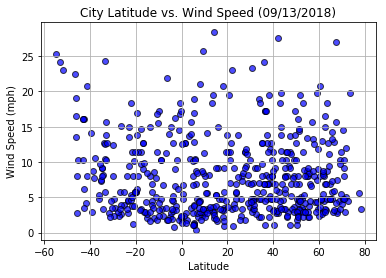

In [203]:
#  --------------  Latitude vs. Wind Speed Plot  --------------------

# x_axis ==> Latitude
# y_axis ==> Wind Speed (%)

plt.scatter(weather_df['lat'], weather_df['wind_speed'], edgecolors="black",
            marker="o", alpha=0.7, facecolors="blue")

# cosmatic stuff
todays_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.title("City Latitude vs. Wind Speed (" + todays_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Wind_Speed.png")
plt.show()

In [204]:
# Convert to script
get_ipython().system('jupyter nbconvert --to script WeatherPy.ipynb')

[NbConvertApp] Converting notebook WeatherPy.ipynb to script
[NbConvertApp] Writing 6177 bytes to WeatherPy.py
